# Author: Emmanuel Rodriguez

https://emmanueljrodriguez.com/

Date: 20 May 2022

Location: West Texas, USA

## Requirements:

Perform mutiple linear regression on a King County (county in Washington state, Seattle inclusive) housing dataset, by considering multiple attributes (#bedrooms, #baths, sqft, year built, selling price, etc.) in the machine learning regression model, and predict future value.

Dataset source: https://www.kaggle.com/datasets/vallabhadattap/kingcountyhousing?select=KC_housing_data.csv

*Alternative / Updated* Housing dataset for Seattle homes sold during Aug. 2022 - Dec. 2022:

https://www.kaggle.com/datasets/samuelcortinhas/house-price-prediction-seattle

# Acquire

## 1. Import libraries

In [3]:
# Fundamental libraries and visualization
import pandas as pd # pandas is a core library, used to construct dataframes (arrays) and perform data analysis
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visualization library typically w/higher quality
import numpy as np

# Import statistics libraries
import statsmodels.api as sm # library with functions for estimation of stats models
from scipy import stats # stats library

<blockquote> 'statsmodels' is a Python *module*, a subroutine, that provides *classes* (the "cookie cutters") and functions (the *subroutines*, or methods, that operate within a "cookie" - the "cookie" is known as an *object*) for the estimation of stats models, for conducting stats tests, and statistical data exploration.

See: [statsmodels Introduction](https://www.statsmodels.org/stable/index.html)

``import`` vs ``from import`` - What's the difference?

* ``import`` imports a *module* (an entire code library)
* ``from import`` imports a specific *class* (member of the library) from that *module*

In the code above, if ``scipy`` would have been imported using ``import``, then anytime we chose to call the ``stats`` class, we would do so by coding ``scipy.stats``.

Ref: https://www.codingem.com/python-difference-between-import-and-from-import/

In [4]:
# scikit-learn is a ML python library
from sklearn.metrics import accuracy_score # from the sklearn.metrics module, 
# the 'accuracy_score' function computes an accuracy score as a function of input args 
# predicted and true values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import KFold, cross_val_score

### 1.1 Read data

In [5]:
data = pd.read_csv('.\Data\KC_housing_data.csv') # Reads the csv file into a Pandas DataFrame.

# Prepare

## 2. Initial data exploration

In [6]:
data.__dir__() # The method returns the list attributes; attributes, or class attributes, are class variables that are 
# inherited by every object of a class.

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [7]:
data.head() # View column headers with the 'head' function

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
# Number of samples (array dimensions)
data.shape # Use the 'shape' method to fetch the dimensions of the Pandas DataFrame object

(4600, 18)

In [9]:
data.isnull() # Use the Pandas 'isnull()' function to detect missing values in the DataFrame 'data', returns an object
# of the same type of that used in the input (i.e., a Pandas DataFrame) with boolean values - False indicating data
# DOES exist, True indicating missing data.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#data.isnull().any() # Return whether any element is True, potentially over an axis; returns False unless there is at 
# least one element within a series or along a DataFrame axis that is True.

# *[None]* reduce all axes, return a scalar.
# What does it mean to 'reduce'? - To transform the data into a 'simplified form', in this example - transform the data 
# to False if data exists, or True if data does not exist.

# *axis=1* reduces the columns, return a Series whose index is the original index.
# I.e., the function is looking at every single element w/in a column to evaluate if any element is True, and 'reduces'
# the findings into a Series.

In [11]:
data.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 4600, dtype: bool

In [12]:
# Search for NaN elements
data[data.isnull().any(axis=1)] # Use the Pandas 'isnull()' function to detect missing values in the DataFrame 'data'; 
# If any missing values are detected, then the missing element *should* be shown, that is - it's index / column position. 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


### Use Pandas to prepare data

In [13]:
# Configure options
pd.set_option('precision', 4) # Max number of decimal places
pd.set_option('max_columns', 9) # Max columns to display
pd.set_option('display.width', None) # Specifies the width in characters of the terminal, None tells pandas to auto-detect

In [14]:
# 10/29/2022 19:40... continue here:
# Use Pandas to prepare data to be used as input for ML models (ref pseudocode)

In [15]:
feature_names = data.columns[2:] # Use the columns attribute to get the column names / feature names starting at column 2
# via 'slicing' - access subarrays with the slice notation, marked by the colon character :
# Returns the feature names in the form of an 'Index' object; the basic object storing axis labels for all Pandas objects.
feature_names

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [16]:
kingCounty_df = pd.DataFrame(data, columns = feature_names) # Creates a new DataFrame using the data DataFrame and setting
# the columns equal to the feature_names variable (which is an object that holds the keys/indices of the data DataFrame,
# starting at column 2)

In [17]:
kingCounty_df

,bedrooms,bathrooms,sqft_living,sqft_lot,...,street,city,statezip,country
0,3,1.50,1340,7912,...,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5,2.50,3650,9050,...,709 W Blaine St,Seattle,WA 98119,USA
2,3,2.00,1930,11947,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,3,2.25,2000,8030,...,857 170th Pl NE,Bellevue,WA 98008,USA
4,4,2.50,1940,10500,...,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,...,501 N 143rd St,Seattle,WA 98133,USA
4596,3,2.50,1460,7573,...,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,3,2.50,3010,7014,...,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,4,2.00,2090,6630,...,5148 S Creston St,Seattle,WA 98178,USA


In [18]:
kingCounty_df['Sale_Price'] = pd.Series(data.price) # Adds a column to the new DF, using the 'price' Pandas Series

In [19]:
# See the first five rows of data using the head function
kingCounty_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,...,city,statezip,country,Sale_Price
0,3,1.50,1340,7912,...,Shoreline,WA 98133,USA,313000.0
1,5,2.50,3650,9050,...,Seattle,WA 98119,USA,2384000.0
2,3,2.00,1930,11947,...,Kent,WA 98042,USA,342000.0
3,3,2.25,2000,8030,...,Bellevue,WA 98008,USA,420000.0
4,4,2.50,1940,10500,...,Redmond,WA 98052,USA,550000.0


In [20]:
# Rearrange the columns so that 'Sale_Price' is column '0'
#cols = kingCounty_df.columns.tolist() # Use the columns class attribute (which has been inherited by the 
# DataFrame object) to get the column labels (Pandas Series object output), then use the 'tolist()' method to
# return a 'list' of the values
cols = kingCounty_df.columns.tolist()
cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country',
 'Sale_Price']

In [21]:
# Move the last element in the cols list array to the first position
cols = cols[-1:] + cols[:-1] # 'cols[-1:]' gets the last element, 'cols[:-1]' gets all elements except the last 
cols

['Sale_Price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [22]:
print(type(cols))
# Now use the 'cols' list as an input to be used as the index to re-arrange the data
kingCounty_df = kingCounty_df[cols]

<class 'list'>


In [23]:
# Summary statistics
kingCounty_df.describe()

,Sale_Price,bedrooms,bathrooms,sqft_living,...,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.6000e+03,4600.0000,4600.0000,4600.0000,...,4600.0000,4600.0000,4600.0000,4600.0000
mean,5.5196e+05,3.4009,2.1608,2139.3470,...,1827.2654,312.0815,1970.7863,808.6083
std,5.6383e+05,0.9088,0.7838,963.2069,...,862.1690,464.1372,29.7318,979.4145
min,0.0000e+00,0.0000,0.0000,370.0000,...,370.0000,0.0000,1900.0000,0.0000
25%,3.2288e+05,3.0000,1.7500,1460.0000,...,1190.0000,0.0000,1951.0000,0.0000
50%,4.6094e+05,3.0000,2.2500,1980.0000,...,1590.0000,0.0000,1976.0000,0.0000
75%,6.5496e+05,4.0000,2.5000,2620.0000,...,2300.0000,610.0000,1997.0000,1999.0000
max,2.6590e+07,9.0000,8.0000,13540.0000,...,9410.0000,4820.0000,2014.0000,2014.0000


In [24]:
print("The average sale price of a home in King County was $%.2f in the 2014 time-frame." %kingCounty_df.Sale_Price.mean())

The average sale price of a home in King County was $551962.99 in the 2014 time-frame.


In [25]:
kingCounty_df.Sale_Price.mean()

551962.9884730439

In [26]:
# Create new DataFrame with only CONTINUOUS data features

#data_cont1 = data.iloc[:, 0] 
#data_cont2 = data.iloc[:,2:14]
#data_cont = pd.concat([data_cont1, data_cont2], axis=1) # Set logic to other axis
#https://pandas.pydata.org/docs/user_guide/merging.html?highlight=concatenate
#type(data)

# Revise: The date column contains string data, will omit from analysis for now...
data_cont = data.iloc[:, 2:14]

In [27]:
#data_cont1

In [28]:
#data_cont2

In [29]:
type(data_cont)

pandas.core.frame.DataFrame

In [30]:
data_cont.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,...,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.50,1340,7912,...,1340,0,1955,2005
1,5,2.50,3650,9050,...,3370,280,1921,0
2,3,2.00,1930,11947,...,1930,0,1966,0
3,3,2.25,2000,8030,...,1000,1000,1963,0
4,4,2.50,1940,10500,...,1140,800,1976,1992


In [31]:
# Independent variable, price
price_series = data.iloc[:,1] # Series

In [32]:
# Verify number of samples for both independent variables and dependent variables match
print(data_cont.shape)
print(price_series.shape)

(4600, 12)
(4600,)


In [33]:
# Number of samples
data.shape

(4600, 18)

In [34]:
# Get features, for this DataSet - this will be the column labels. Note date and price are not considered features.
# Categorical features are omitted in this study.
features = data.columns[2:-4].tolist()
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [35]:
# Search for NaN elements
data[data.isnull().any(axis=1)]

,date,price,bedrooms,bathrooms,...,street,city,statezip,country


No columns containing 'NaN' elements shown, therefore, this a 'full' dataset.

In [36]:
# Summary stats for each column
data.describe() # Note the describe() method returns description of the data in the DataFrame, except for categorical cols. 

,price,bedrooms,bathrooms,sqft_living,...,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.6000e+03,4600.0000,4600.0000,4600.0000,...,4600.0000,4600.0000,4600.0000,4600.0000
mean,5.5196e+05,3.4009,2.1608,2139.3470,...,1827.2654,312.0815,1970.7863,808.6083
std,5.6383e+05,0.9088,0.7838,963.2069,...,862.1690,464.1372,29.7318,979.4145
min,0.0000e+00,0.0000,0.0000,370.0000,...,370.0000,0.0000,1900.0000,0.0000
25%,3.2288e+05,3.0000,1.7500,1460.0000,...,1190.0000,0.0000,1951.0000,0.0000
50%,4.6094e+05,3.0000,2.2500,1980.0000,...,1590.0000,0.0000,1976.0000,0.0000
75%,6.5496e+05,4.0000,2.5000,2620.0000,...,2300.0000,610.0000,1997.0000,1999.0000
max,2.6590e+07,9.0000,8.0000,13540.0000,...,9410.0000,4820.0000,2014.0000,2014.0000


In [37]:
# What do the codes in certain features indicate? Features such as, waterfront, view, condition?
# What are their max/min values? 
# print("Max waterfront:", max(data['waterfront']))
# print("Min waterfront:", min(data['waterfront']))
# print("Max view:", max(data['view']))
# print("Min view:", min(data['view']))
# print("Max condition:", max(data['condition']))
# print("Min condition:", min(data['condition']))

Code decypher:

* Waterfront home (1/0), Y/N?
* View (4-0), 4 being the best view.
* Condition (5-1), 5 being excellent condition and 1 being poor condition.

The code was decyphered by using Google maps to perform a street-view observation of randomly selected samples to support the analyst's intuition about the coding convention used.

In [38]:
# How do I remove the 'WA' in the 'statezip' column? I may need the zip code data to perform geovisualization.
# Although, latitudes and longitudes would be even better. Come back to this.

## 3. Visualization

Visualize features - explore how the home's sale price relates to each feature.

In [39]:
# Plot the target value against each feature.

# Use the sample() method to randomly select 10% of the samples.
#sample_df = data.sample(frac=0.1, random_state=72) # random_state seeds the random number generator.
sample_df = kingCounty_df.sample(frac=0.1, random_state=72) # random_state seeds the random number generator.

In [40]:
# Call the Seaborn library, then configure its font and display style
sns.set(font_scale=2) # Scale default fonts by two
sns.set_style('whitegrid')

In [41]:
kingCounty_df.columns

Index(['Sale_Price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [42]:
# To plot each feature against price, get the features names from the kingCounty_df DataFrame
# Only the continuous features will be evaluated, as the scikit-learn ML estimators use all
# numerical features as input arguments (see Deitel, p. 621)
features = kingCounty_df.columns[:-4].tolist()
features

['Sale_Price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

### Plot each feature against the target (price)

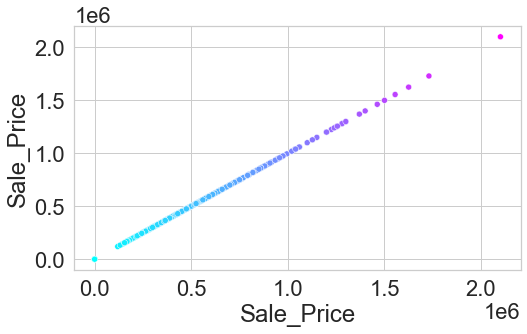

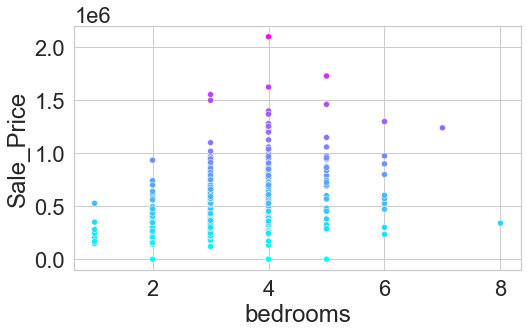

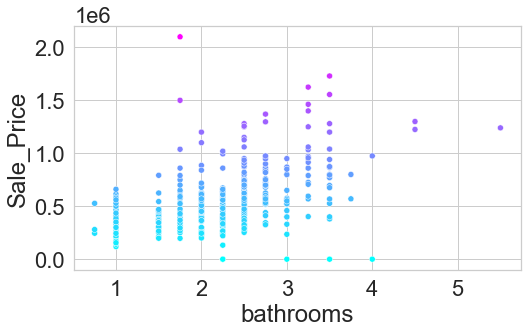

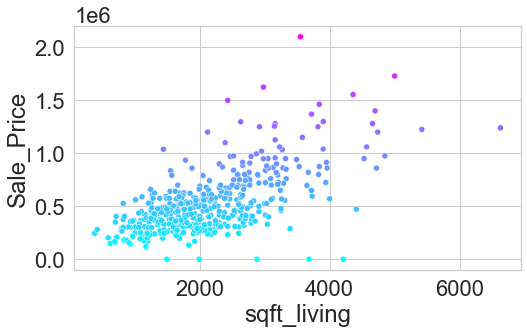

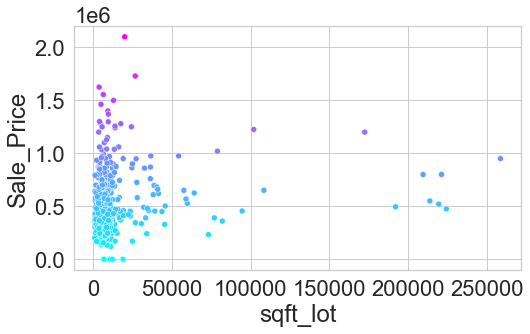

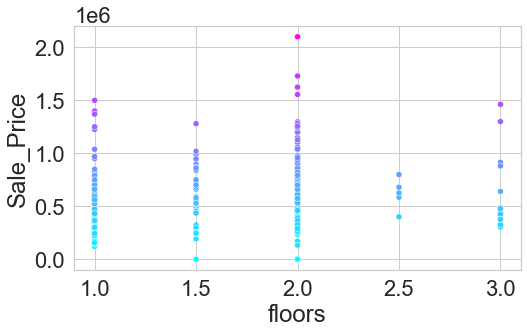

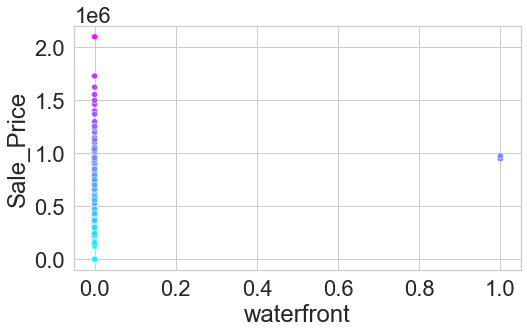

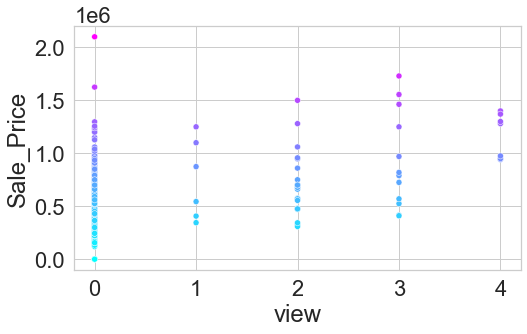

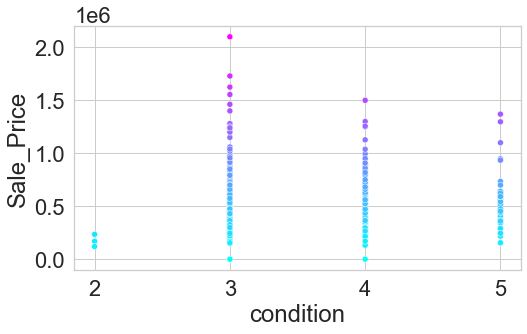

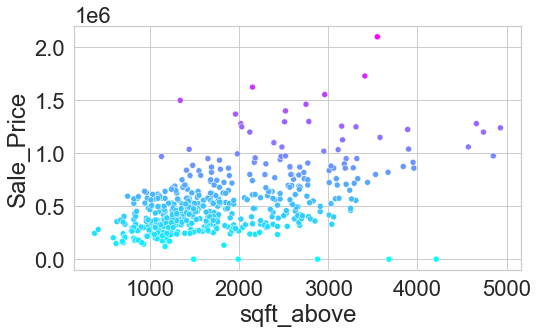

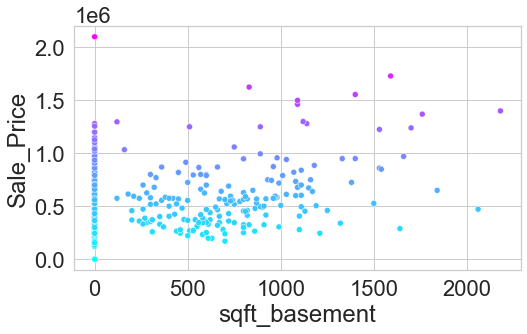

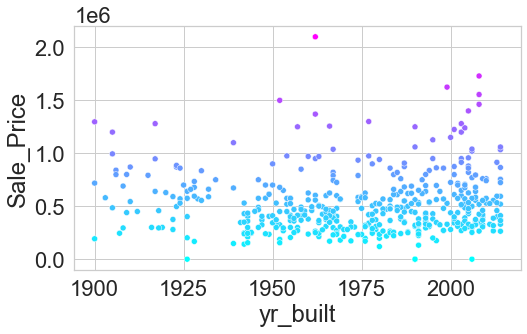

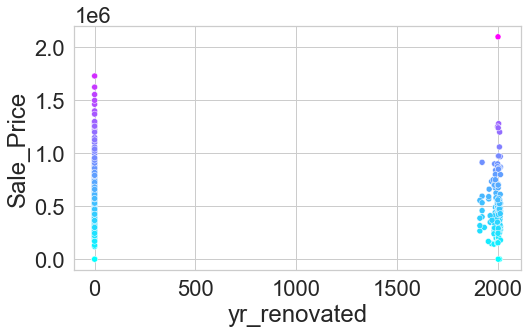

In [43]:
for features in features: # The for statement is used to iterate over the elements of a sequence 
    plt.figure(figsize=(8,4.5))
    sns.scatterplot(data=sample_df, x=features, y='Sale_Price', hue='Sale_Price', palette='cool', legend=False)

What observations can be seen from these visualizations?

* Almost all features have a positive correlation with price, with the exception of:
 * 'sqft_lot' - which shows a few, albeit possibly outliers, data points that remain 'in-line' with their lower-value counterparts
 * 'yr_built' also seems to have minimal effect on sale price

### Pairwise Relationship

A pairwise comparison can provide insight to determine which features are highly-correlated and therefore make a more robust selection of features. If two features are highly correlated, then one of those features may be ommitted from the model to remove complexity, so that the model can have as much predictive power with a minimal amount of features.

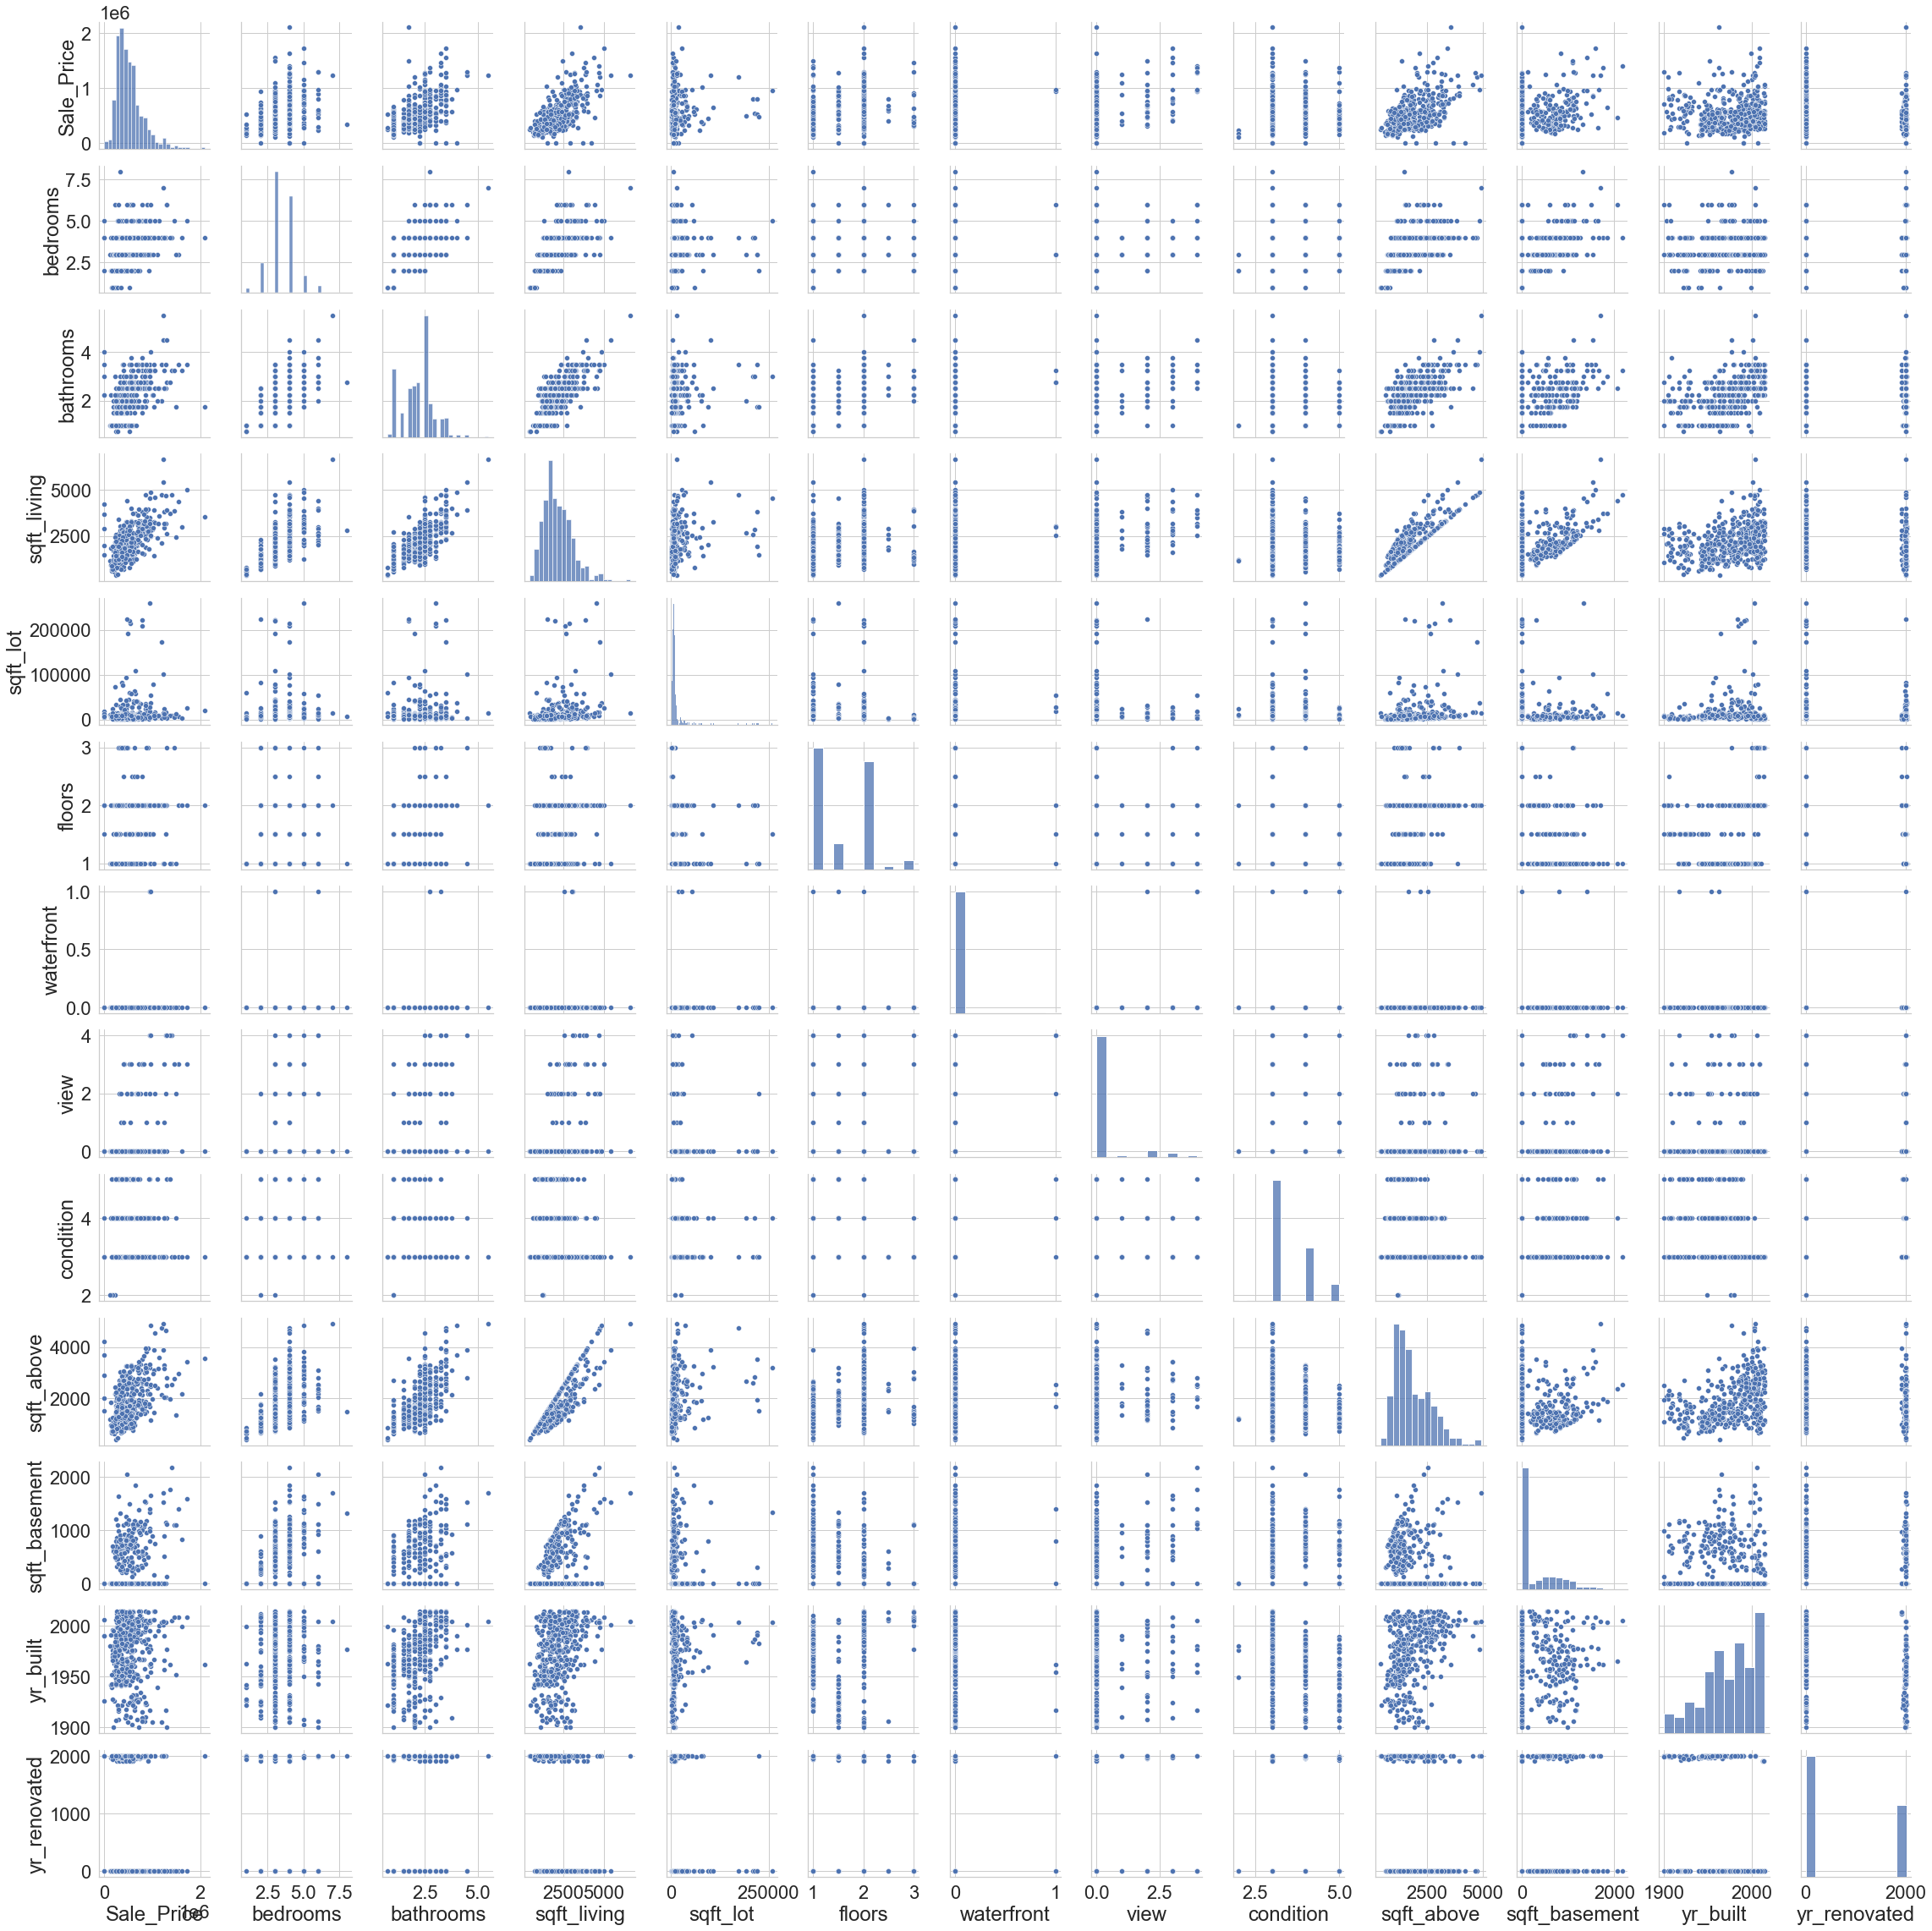

In [44]:
# Plot pairwise relationships in the dataset; 
sns.pairplot(sample_df)

### Heatmaps and Correlation

25JAN2023 11:13 @ Seattle, WA

Ref:
https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10
* Continue w/removing highly correlated features

Heat maps are an alternative method to visualiztion correlation.

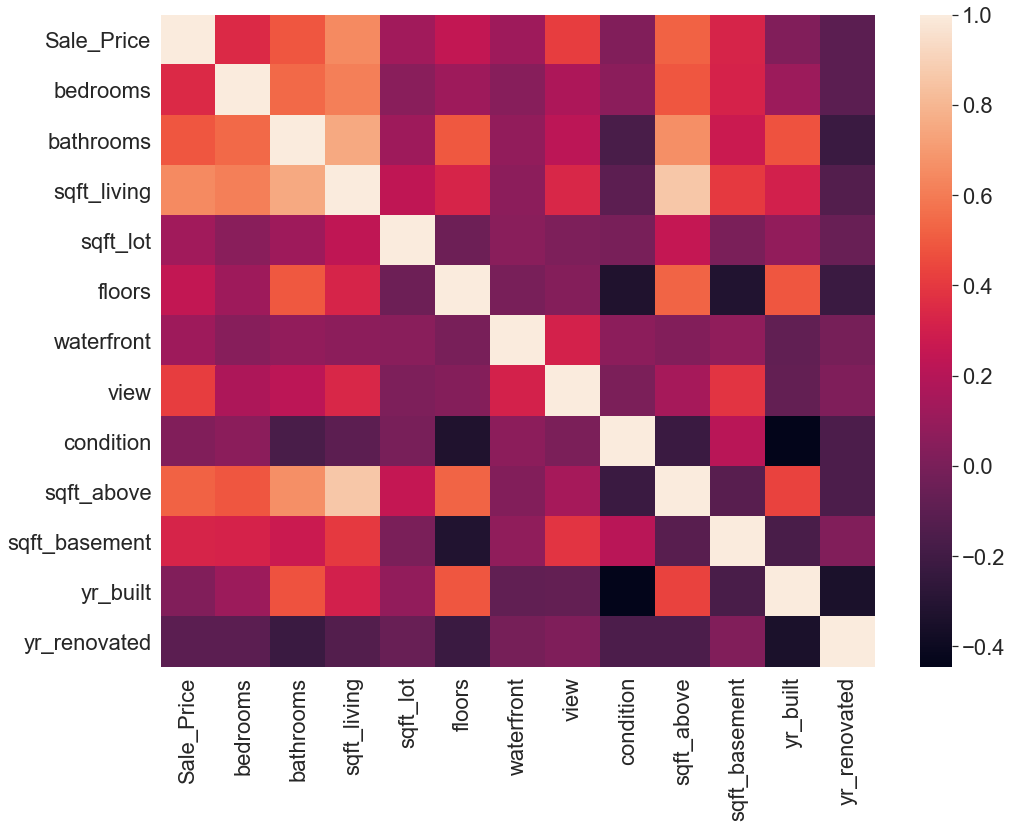

In [78]:
matrix = sample_df.corr() # Calculate the matrix by calling the corr() method on the sample DataFrame

plt.figure(figsize=(16,12)) # Create a figure object

# Then pass the matrix to Seaborn's heatmap function to generate the visual
matrixHeatmap = sns.heatmap(matrix)

The above heat map is difficult to read, we can augment it by adding a custom diverging palette (setting the color gradient), and enabling annotations to get a direct quantitative read for each feature-pair. 

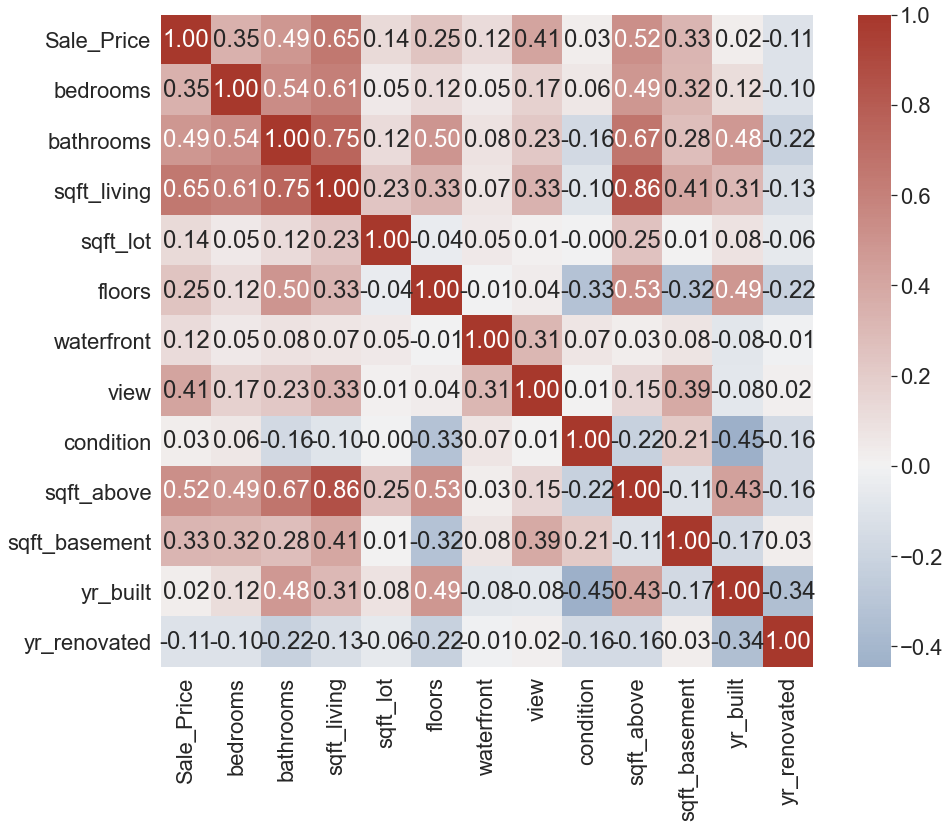

In [79]:
# Create a custom diverging palette

plt.figure(figsize=(16,12))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True) # Use the Seaborn 'diverging_palette' function 
# to make a diverging palette between two HUSL colors.

matrixHeatmap = sns.heatmap(matrix, center=0, annot=True, fmt='.2f', square=True, cmap=cmap) # Center the color bar
# around 0, enable annotations to see numerical value of correlation, then use 2 decimal points.

To make it more digestible, remove the upper diagonal (which is simply a mirror of the lower).

<AxesSubplot:>

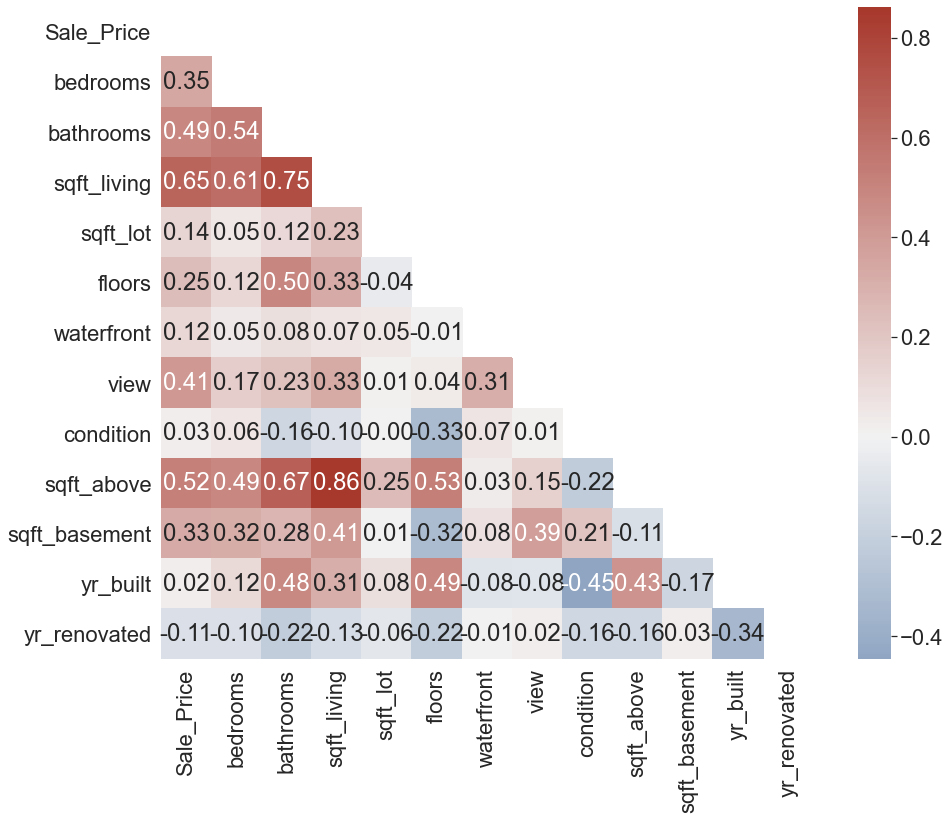

In [80]:
# First, create a mask - the mask() method replaces the values of the elements where the condition evaluates to True.

plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool)) 
# The np.ones_like() function creates a 2D array with the same shape as the correlation matrix filled w/True values.

# This is then passed to the np.triu() function to convert it to a boolean mask, which will be passed to the
# heatmap's mask argument.

# The numpy triu() function returns a copy of an array with the elements below the k-th diagonal zeroed.

sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap) # fmt is format, set to 2 floating
# point decimals, square sets the cells to be square-shaped

Remove highly correlated features

* Recall: When two features are highly correlated, one of those features won't provide any additional insight than that already provided by the first.
* To increase the predictive power of the model, with the minimal amount of features required, then it becomes essential to remove those that are not contributing to the model.

For this dataset, a (arbitrarily chosen based on visual exploration of the heatmap correlation values) threshold of 0.8 will be set as the deciding factor if a feature will be dropped or not.

In [77]:
# Reduced matrix
#reduced_matrix = matrix.mask(mask) # Use the Pandas DataFrame 'mask' method to put NaN values in the upper 
# half of the diagonal

#reduced_matrix.head() # To see the first five rows of data

In [66]:
# Find columns that meet the 0.80 threshold

#to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > 0.8)]

In [67]:
#to_drop

In [81]:
def identify_correlated(df, threshold):
    
    # A function to identify highly correlated features.
    
    # Compute correlation matrix with absolute values
    matrix = sample_df.corr().abs()
    
    # Create a boolean mask
    # Recall that using a Boolean array as a mask allows the selection of particular subsets of the data themselves
    # Ref: https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html
    
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    # The np.ones_like() function creates a 2D array with the same shape as the correlation matrix filled w/True values.

    # This is then passed to the np.triu() function to convert it to a boolean mask, which will be passed to the
    # heatmap's mask argument.

    # The numpy triu() function returns a copy of an array with the elements below the k-th diagonal zeroed.
    
    # Subset the matrix
    reduced_matrix = matrix.mask(mask) # Use the Pandas DataFrame 'mask' method to put NaN values in the upper 
    # half of the diagonal
     
    # Find columns that meet the threshold, using a list comprehension approach
    # *For a breakdown on the list comprehension approach, see handwritten notes 2/4/23 14:48 - 2/5/23 11:14*
    to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > threshold)]
    
    return to_drop

In [85]:
# See which features are being dropped; should cross-check with the heat-map above

to_drop = identify_correlated(matrix, threshold=0.8)
print(to_drop)
print(type(to_drop))

['sqft_living']
<class 'list'>


In [86]:
# Drop the columns from the larger DataFrame

kingCounty_df_reduced = kingCounty_df.drop(to_drop, axis=1) # Use the Pandas DF drop() method to drop specified labels
# Feed the 'to_drop' list to set the labels to drop
# Set the axis parameter to 1, to drop labels from the columns (0 or 'index', 1 or 'columns')

In [88]:
kingCounty_df_reduced.columns # Use the columns attribute to list the column labels in the new DataFrame

Index(['Sale_Price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

# Analyze

## 4. Machine learning model

### Split data for training and testing

In [100]:
# Output the DataFrame (to refresh your memory) 
kingCounty_df_reduced

,Sale_Price,bedrooms,bathrooms,sqft_lot,...,street,city,statezip,country
0,3.1300e+05,3,1.50,7912,...,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.3840e+06,5,2.50,9050,...,709 W Blaine St,Seattle,WA 98119,USA
2,3.4200e+05,3,2.00,11947,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.2000e+05,3,2.25,8030,...,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.5000e+05,4,2.50,10500,...,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...
4595,3.0817e+05,3,1.75,6360,...,501 N 143rd St,Seattle,WA 98133,USA
4596,5.3433e+05,3,2.50,7573,...,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.1690e+05,3,2.50,7014,...,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.0340e+05,4,2.00,6630,...,5148 S Creston St,Seattle,WA 98178,USA


In [101]:
# Create new variables to hold the independent and dependent variable data; 
# these two data structures will be fed into the sci-kit learn train_test_split function

# Independent variable, price
price_series = kingCounty_df_reduced.iloc[:,0] # Series, all rows in column 0

features_df = kingCounty_df_reduced.iloc[:,1:-4] # DataFrame, all rows starting at column 1, excluding the last four columns
# as they are categorical data (the ML estimator - LinearRegression, works best w/continuous data [ref needed])

In [102]:
#kingCounty_df_reduced
print(price_series)
print(features_df)

0       3.1300e+05
1       2.3840e+06
2       3.4200e+05
3       4.2000e+05
4       5.5000e+05
           ...    
4595    3.0817e+05
4596    5.3433e+05
4597    4.1690e+05
4598    2.0340e+05
4599    2.2060e+05
Name: Sale_Price, Length: 4600, dtype: float64
      bedrooms  bathrooms  sqft_lot  floors  ...  sqft_above  sqft_basement  \
0            3       1.50      7912     1.5  ...        1340              0   
1            5       2.50      9050     2.0  ...        3370            280   
2            3       2.00     11947     1.0  ...        1930              0   
3            3       2.25      8030     1.0  ...        1000           1000   
4            4       2.50     10500     1.0  ...        1140            800   
...        ...        ...       ...     ...  ...         ...            ...   
4595         3       1.75      6360     1.0  ...        1510              0   
4596         3       2.50      7573     2.0  ...        1460              0   
4597         3       2.50      70

In [103]:
X_train, X_test, y_train, y_test = train_test_split(features_df, price_series, random_state=72) # Input arguments are
# independent variables (features array) DataFrame, and the dependent variable (column array) Series

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [104]:
print(X_train.shape)
print(X_test.shape)

(3450, 11)
(1150, 11)


### Train the model

In [105]:
linear_regression = LinearRegression() # Create and set a new variable to Scikit-learn's 'LinearRegression' estimator
# By default the 'LinearRegression' estimator uses all features in the data array to perform multiple linear-regression.

# Invoke the 'fit' method to train the estimator
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [106]:
# Get regression summary
X2 = sm.add_constant(X_train) # Adds a column of ones to the array of features -- Why is this needed?
# "An intercept is not included by default and should be added by the user." ... Not convinced, come back to this...
# See: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

est = sm.OLS(y_train, X2) # ordinary least squares, to measure the spread in the data
est2 = est.fit() # fit model to data

# Print summary table
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     70.02
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          4.08e-142
Time:                        16:49:11   Log-Likelihood:                -50547.
No. Observations:                3450   AIC:                         1.011e+05
Df Residuals:                    3438   BIC:                         1.012e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.275e+06   8.79e+05      4.864

In [117]:
# Continue here... Wow! That adj. r-square value is LOW!
# Wait, does the data need to be normalized? The data should be normalized to give an apples to apples 
# comparison of the coefficients.

To do:
1. I need to standardize the data. See: https://scikit-learn.org/stable/modules/preprocessing.html, 6.3.1
2. Compare the effect of different scalers on data with outliers. See: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

### Test the model

In [107]:
# Test the model by calling the estimator's 'predict' method with the test samples 'X_test' as an argument
predicted = linear_regression.predict(X_test) # Store the array of predictions

expected = y_test # Store the array of expected values

In [108]:
# Look at the first five predictions and their corresponding expected values
predicted[:5]

array([488292.28741359, 676008.72061532, 748618.59950245, 284565.1545982 ,
       293376.01728674])

In [110]:
expected[:5]

953     490000.0
3112    415000.0
4019    821000.0
2318    148000.0
1446    429000.0
Name: Sale_Price, dtype: float64

Visualize the Expected vs Predicted Prices:

In [111]:
# Create a DataFrame containing columns for the expected and predicted values:

df = pd.DataFrame()

df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

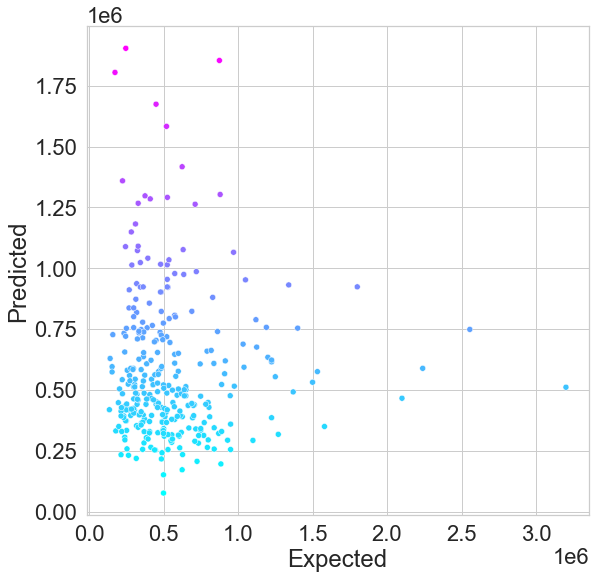

In [112]:
# Plot the data as a scatter plot with the expected (target) prices along the x-axis and the predicted prices
# along the y-axis

figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

In [113]:
# Set the x- and y-axes' limits to use the same scale along both axes:

start = min(expected.min(), predicted.min()) # Get the min value of the two
end = max(expected.max(), predicted.max()) # Get the max value of the two

axes.set_xlim(start, end)
axes.set_ylim(start, end)

(0.0, 4489000.0)

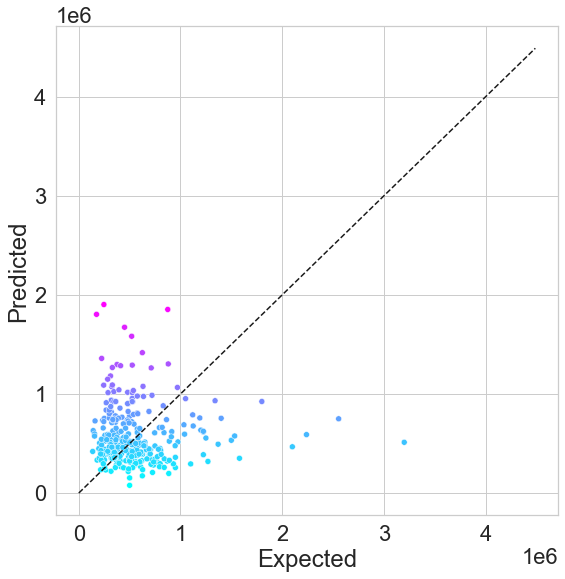

In [117]:
# Recreate figure
figure = plt.figure(figsize=(9,9))

# Plot a line that represents perfect predictions (not a regression line)
line = plt.plot([start, end], [start, end], 'k--')

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

If every predicted value were to match the expected value, then all the data points would be plotted along the dashed line.
* It appears that as the expected median house value increases, more of the predicted values fall below the line.

### Run multiple models

In [121]:
# Compare several estimators to determine whether any produces better results than the LinearRegression estimator

from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {'LinearRegression': linear_regression, 'ElasticNet': ElasticNet(), 'Lasso': Lasso(), 'Ridge': Ridge()}

# Run the estimators using k-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=features_df, y=price_series, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.441
      ElasticNet: mean of r2 scores=0.430
           Lasso: mean of r2 scores=0.441
           Ridge: mean of r2 scores=0.441


In [ ]:
# 2/5/23 18:42 -- Why is the r2 score of LinearRegression ~.44 when the one shown above in the stats table is close to .18
# need to look into this --- study this further, gain a deep understanding. 